# Testing the etmodule Penman-Monteith and Hargraeves methods versus results from Hydrus

The data is taken from example 4: Rassam, D., et al. "The HYDRUS-1D software package for simulating the one-dimensional movement of water, heat, and multiple solutes in variably-saturated media: Tutorial." Commonwealth Sci. Ind. Res. Org. Land and Water, Adelaide, SA (2018).

### Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import etmodule as et

### Import meteo data and Hydrus ET calculation

In [2]:
meteo = pd.read_csv("data/hydrus_meteo.txt", index_col=0, delim_whitespace=True)
meteo.index = pd.date_range("2015-01-01 00:00:00", "2016-01-01 00:00:00")
wind = meteo["wind"] * 0.01157  # km/d to m/s
tmax = meteo["tmax"]
tmin = meteo["tmin"]
ta = (tmax+tmin)/2
rh = meteo["rhmean"]
solar = meteo["rad"]  #  [MJ/m2/d]
elevation = 145.93
latitude = -17.94 * 3.141592654 / 180

hydrus_pm = pd.read_csv("data/hydrus_pm.txt", index_col=0, delim_whitespace=True)
hydrus_har = pd.read_csv("data/hydrus_har.txt", index_col=0, delim_whitespace=True)

### Calculate Penman-Monteith with etmodule

In [3]:
pm = et.pm_hydrus(wind, elevation, latitude, rs=solar, tmax=tmax,
                                tmin=tmin, rh=rh, croph=0.6)

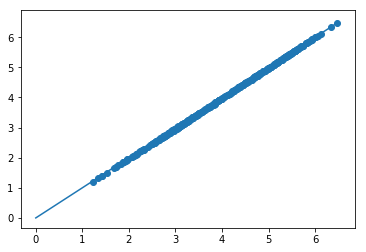

In [4]:
plt.plot(np.linspace(0,np.max(pm),120),np.linspace(0,np.max(pm),120))
plt.scatter(pm,hydrus_pm["ET"])

### Calculate Hargreaves with etmodule

In [5]:
har = et.har_hydrus(tmax, tmin, latitude)

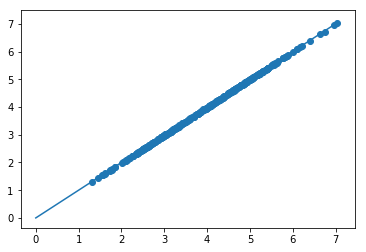

In [6]:
plt.plot(np.linspace(0,np.max(har),120),np.linspace(0,np.max(har),120))
plt.scatter(har,hydrus_har["ET"])

In [7]:
har.values/hydrus_har["ET"]

Time
1.0      0.999666
2.0      1.000795
3.0      1.001669
4.0      1.002365
5.0      1.003856
           ...   
362.0    1.001542
363.0    1.001301
364.0    1.001492
365.0    1.002081
1.0      1.002123
Name: ET, Length: 366, dtype: float64

# Hamon

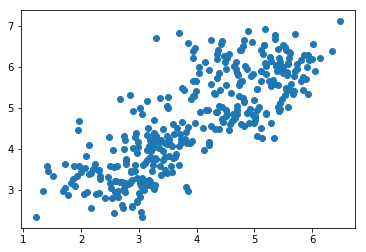

In [8]:
ham = et.hamon(ta, latitude)
plt.scatter(pm, ham)